In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
df=pd.read_csv('marketing_campaign.csv')
df.head(5).style.background_gradient(cmap='Greys')

In [3]:
print("Shape of the DataFrame is :",df.shape)

Shape of the DataFrame is : (2240, 29)


In [4]:
print("Columns in DataFrame is :\n",df.columns)

Columns in DataFrame is :
 Index([''ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [5]:
print("Print a Summary of a Dataframe is :",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   'ID                  2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe().style.background_gradient(cmap='Greys')

In [7]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df).style.background_gradient(cmap='Greys')

In [8]:
df['Income']=df['Income'].fillna(df['Income'].median())

In [9]:
df.isnull().sum()

'ID                    0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
df[df.duplicated()]

Empty DataFrame
Columns: ['ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

In [11]:
df.nunique()

'ID                    2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [12]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head(5).style.background_gradient(cmap='Greys')

In [13]:
print("Unique categories present in the Year_Birth:",df["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: 1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


In [14]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [15]:
df['Education'].nunique()

5

In [16]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [17]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

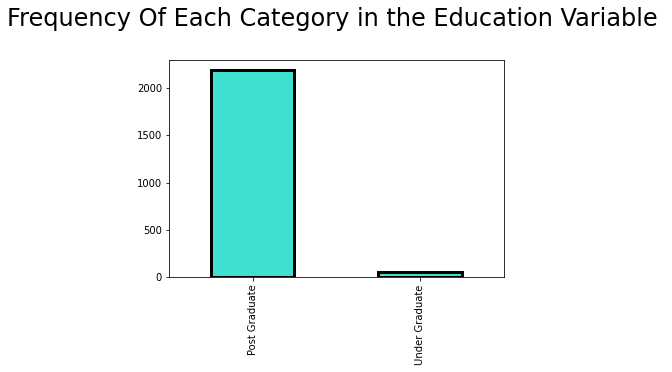

<Figure size 576x576 with 0 Axes>

In [18]:
df['Education'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Education Variable \n",fontsize=24)
plt.figure(figsize=(8,8))
plt.show()

In [19]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [20]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [21]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

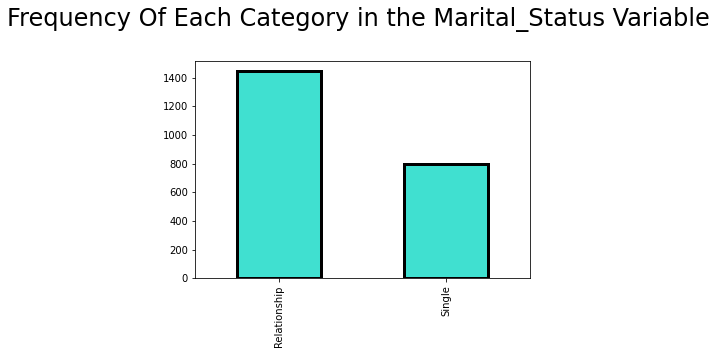

<Figure size 576x576 with 0 Axes>

In [22]:
df['Marital_Status'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Marital_Status Variable \n",fontsize=24)
plt.figure(figsize=(8,8))
plt.show()

In [23]:
df['Income'].max()

666666.0

In [24]:
df['Income'].min()

1730.0

In [25]:
df['Income'].mean()

52237.97544642857

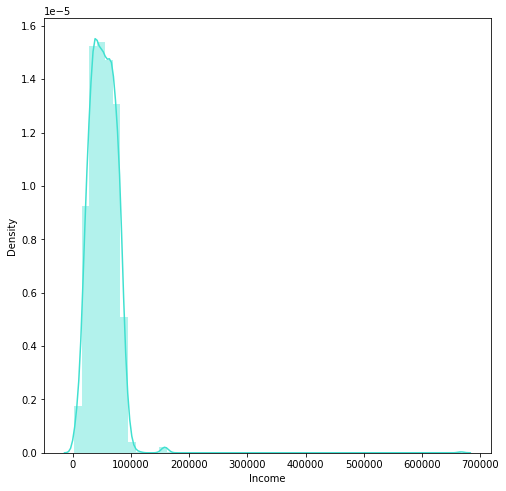

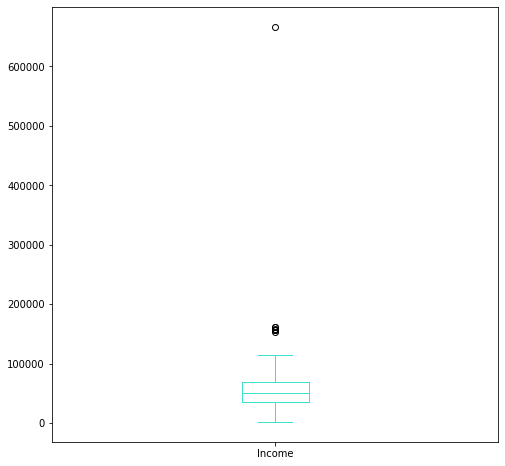

In [26]:
plt.figure(figsize=(8,8))
sns.distplot(df["Income"],color = 'turquoise')
plt.show()
df["Income"].plot.box(figsize=(8,8),color = 'turquoise')
plt.show()

In [112]:
df=df.loc[df.Income<df.Income.max()]

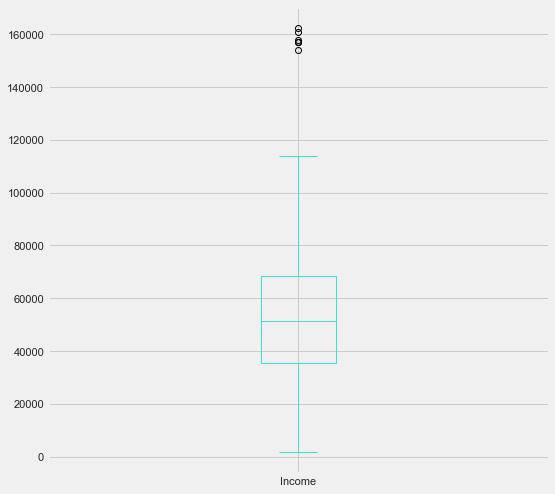

In [113]:
df["Income"].plot.box(figsize=(8,8),color = 'turquoise')
plt.show()

In [27]:
df['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [28]:
df['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

In [29]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

Unique categories present in the Kids: 1    1128
0     638
2     421
3      53
Name: Kids, dtype: int64




<Figure size 576x576 with 0 Axes>

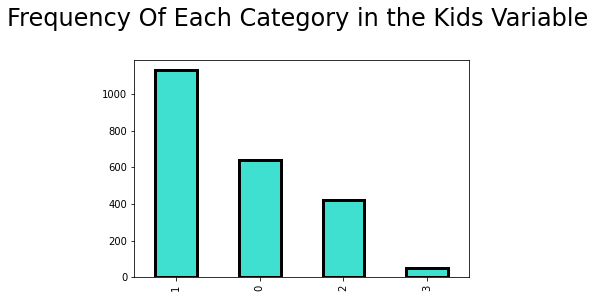

<Figure size 576x576 with 0 Axes>

In [30]:
print("Unique categories present in the Kids:",df['Kids'].value_counts())
print("\n")

#VISUALIZING THE "Kids"
df['Kids'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Kids Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

In [31]:
df['MntWines'].unique()

array([ 635,   11,  426,  173,  520,  235,   76,   14,   28,    5,    6,
        194,  233,    3, 1006,   53,   84, 1012,    4,   86,    1,  867,
        384,  270,   36,  684,    8,  112,  110,   96,  482,   40,  702,
         55,  437,  421,   13,    9,   81,  123,   48,  826,  245,  650,
         12,  510,  328,  984,  295,  447,  712,  452,  523,  546,  398,
         10,  688,  247,  856,  496,   25,  258,  565,    2,  721, 1032,
        577,   64,  163,   17,  130,  292,  350,  135,  230,    7,  445,
         15,   27,  505,   51,  207,   41,  386,  562,  217,  144,  454,
        425, 1332,  527,  490,  378,  547,   47,  320,   34,  722,  162,
        450,   70,  352,  492,  120,  534,  236,  231,  220,  796,    0,
        962,  738,  399,  614,   32,  598,   73,   42,  346,  888,  997,
        212,  536, 1349, 1001,   20,   18,  125,  277,   85,   59, 1149,
        847,   29,  152,  620,   35,  356,  783,  466,   23,  656,  519,
        344,  448,  265,  587,  763,   22,   54, 11

In [32]:
df['MntFruits'].unique()

array([ 88,   1,  49,   4,  43,  42,  65,  10,   0,   5,  16,  61,   2,
        14,  22,  80,  17,   3, 100,  12,  34,   8,  76,  11, 164,  18,
         6,  50,  19,  37, 120,   9,  51,  35,  26,   7,  40,  59,  36,
       107, 111, 105,  23,  60,  46, 172,  81, 106, 194, 115,  44,  99,
        90,  48,  27,  33, 133,  58,  28,  21,  20, 162,  71,  66,  30,
       189, 138,  29,  24,  32,  86, 114, 153,  64, 134, 148,  47,  41,
        84,  74, 129,  15,  98, 183, 147, 144, 104,  91, 163, 152,  53,
        68, 137, 190,  38,  70,  96,  25,  13,  83,  92,  73, 155,  54,
       151,  85, 127,  63,  45, 103,  69,  89, 181, 112, 159, 102, 123,
       166, 142,  79,  39,  31, 178,  93,  97, 168, 174, 122, 199,  62,
        55, 101,  67, 117, 108,  57, 130, 161,  56, 124, 126,  75, 185,
        72,  87, 197,  82, 184, 160,  77, 140, 131, 132, 169, 193, 149,
       143, 154], dtype=int64)

In [33]:
df['MntMeatProducts'].unique()

array([ 546,    6,  127,   20,  118,   98,  164,   56,   24,   11,  480,
         53,   17,  115,   19,   38,  498,   73, 1725,   86,  102,   27,
         25,   30,    3,   42,  801,   10,   44,    5,   96,  471,  151,
         14,  206,  536,   29,   50,  266,   15,   48,  317,  125,  780,
        550,  124,  432,  482,    8,   22,   28,  538,  134,  367,    1,
        309,  159,  487,  460,   43,  291,   65,   13,  925,  779,   64,
         68,  424,   16,   37,  568,   39,  192,  359,   26,    7,  447,
         92,  183,  276,  690,   32,  271,   31,  106,  292,  311,   21,
        101,  812,   94,  133,  951,  110,   47,  189,  196,   33,  590,
         34,   12,  921,  232,  756,  132,   41,  141,   18,   90,   78,
         57,  269,   69,  387,  249,   49,  240, 1582,  305,  449,  119,
        195,    2,  107,  537,   45,  813,   79,  553,  337,  138,  113,
        320,  319,   59,  554,  171,    4,  417,  162,  540,  154,  207,
        204,  740,    9,  137,  184,  464,  757,  5

In [34]:
df['MntFishProducts'].unique()

array([172,   2, 111,  10,  46,   0,  50,   3,   1,  11, 225,   6,  59,
       150,  30,  69,  21,  39,  15,  20,  34,  33, 119, 160,  82, 227,
        37,  27, 156,  12, 180, 121,  16, 201,   7,  58, 189,  17,  84,
         4,  97, 137, 110,  49,  98,  75,  65, 185,  80,  31,  23,  29,
       151, 123,  44,  40, 173,  38,  52,  13,  36,  43,  73,  32,   8,
        19, 149, 134,  86, 140, 147, 224,  42,  76,  47, 254,  25,  67,
        28, 186, 218, 104, 133, 220,  45,  24, 205, 162,  95, 101, 188,
        55, 166, 216,  60, 219,  77,  78,  72, 212, 129,  93,  99, 102,
       179,  61,  62, 197, 199, 120, 169, 240,  63,  91, 106, 146,  56,
       127, 136, 168,  54, 132,  71,  64, 231,  85, 202,  41, 125,  26,
       175, 164, 177, 138, 247, 159, 153,  90,  51, 234,  68, 210,  89,
       194, 250, 237, 145, 167,  48, 192, 130, 232, 116, 184, 158,  94,
       259, 115, 207, 112, 182, 141, 124, 171, 193, 242, 246,  35, 142,
       253, 258, 198, 223,   5, 103, 108, 181,  81, 128, 208, 11

In [35]:
df['MntSweetProducts'].unique()

array([ 88,   1,  21,   3,  27,  42,  49,   2, 112,   5,  68,  13,  12,
        16,  24,  38,   0,  32,   6, 263,  66,  22,   8,   7, 178,  30,
        10,  67, 167,  40, 120,  18,  14, 122,  82,  29,  60,   4,  37,
        15, 105,  65, 133,  28,  61, 132,  26,  98,  35,  51,  20, 103,
         9,  72,  89,  41,  71,  44,  33,  11,  91,  76,  17, 113,  19,
       173,  23,  87, 176, 102,  48, 138, 163, 124,  70, 172,  84, 149,
        73,  92, 130,  25,  74, 114, 141,  54, 147,  45,  50,  46,  97,
        64, 118, 153, 189, 107, 128, 134,  36, 150,  78, 137,  34,  95,
       156,  47, 194,  96, 191, 192,  75,  62,  58, 129,  31,  57, 108,
       123, 185, 121, 127, 125, 198,  43, 115,  80, 106, 101, 110,  83,
       160, 166, 136,  56, 116, 182, 148, 161,  69, 157,  55, 143, 169,
        86, 146,  59, 152,  77,  53,  39,  93, 151,  99, 144, 195,  63,
       175, 145, 162, 187, 126,  85, 109, 197, 165, 174, 196,  81, 139,
       188, 142,  94, 262, 179, 100,  79, 111], dtype=int64)

In [36]:
df['MntGoldProds'].unique()

array([ 88,   6,  42,   5,  15,  14,  27,  23,   2,  13,   1,  16,  30,
        45,   4,  28, 176,  39,  48,  19,  99,  41, 362,  10,   0,  89,
         3,  43,  22,  35,  36, 102,   7,  12, 174,  50,  38,  32, 241,
       109, 190,  40,  80, 169,  73,  17,  86,   9,  18,  51,  76,  34,
       145,  53,  75, 223,  11, 111,  81,  65,  79,  60,  72,  33, 120,
       168, 172, 216,  58, 130, 124,  20, 126, 116,  49,   8,  91,  57,
        26, 141, 117,  25,  92,  54,  21, 192,  44,  66, 182, 181, 152,
        77,  70, 148,  24,  69, 146, 162, 131,  74, 135, 203,  52,  63,
        61, 139, 122, 224, 173, 218,  93, 142,  29, 233, 101, 157,  55,
       107, 159,  78, 110, 125, 114,  68, 191,  95,  37,  64,  46, 119,
        90, 134, 108, 153,  84,  59,  31, 175,  85,  71,  47, 118,  83,
       106, 165, 163, 144, 147, 207, 151, 154, 115,  67, 242, 155, 249,
       183, 170,  97, 227, 121, 205, 112, 198, 177, 133,  94,  56,  82,
       187, 171,  98, 129,  96, 166, 195, 231, 158, 123, 200, 17

In [37]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [38]:
df['Expenses'].min()

5

In [39]:
df['Expenses'].max()

2525

In [40]:
df['Expenses'].mean()

605.7982142857143

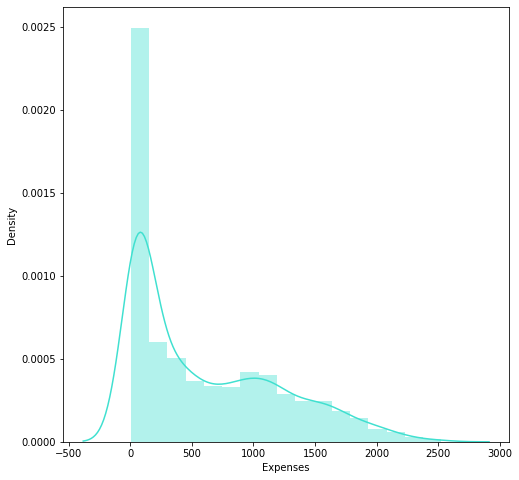

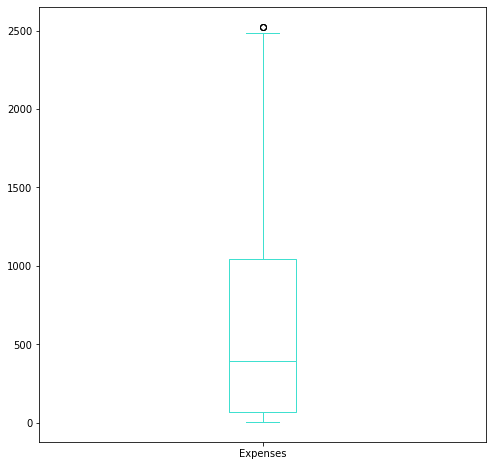

In [41]:
plt.figure(figsize=(8,8))
sns.distplot(df["Expenses"],color = 'turquoise')
plt.show()
df["Expenses"].plot.box(figsize=(8,8),color='turquoise')
plt.show()

In [42]:
df['AcceptedCmp1'].unique()

array([0, 1], dtype=int64)

In [43]:
df['AcceptedCmp2'].unique()

array([0, 1], dtype=int64)

In [44]:
df['AcceptedCmp3'].unique()

array([0, 1], dtype=int64)

In [45]:
df['AcceptedCmp4'].unique()

array([0, 1], dtype=int64)

In [46]:
df['AcceptedCmp5'].unique()

array([0, 1], dtype=int64)

In [47]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

Unique categories present in the TotalAcceptedCmp: 0    1777
1     325
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64




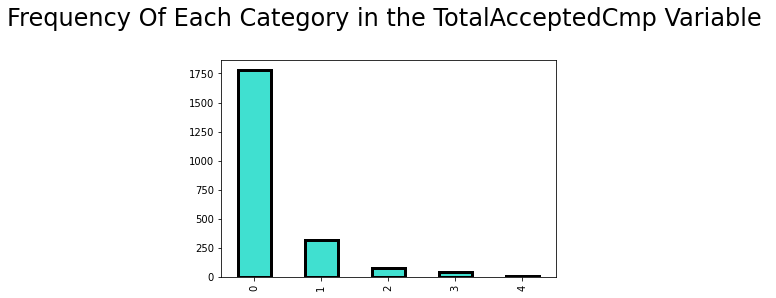

<Figure size 576x576 with 0 Axes>

In [49]:
print("Unique categories present in the TotalAcceptedCmp:",df['TotalAcceptedCmp'].value_counts())
print("\n")

df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)
plt.figure(figsize=(8,8))
plt.show()

In [50]:
df['NumWebPurchases'].unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 27, 10,  9, 23, 25],
      dtype=int64)

In [51]:
df['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22],
      dtype=int64)

In [52]:
df['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1],
      dtype=int64)

In [53]:
df['NumDealsPurchases'].unique()

array([ 3,  2,  1,  5,  4, 15,  7,  0,  6,  9, 12,  8, 10, 13, 11],
      dtype=int64)

In [54]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [55]:
df['NumTotalPurchases'].min()

0

In [56]:
df['NumTotalPurchases'].max()

44

In [57]:
df['NumTotalPurchases'].mean()

14.862053571428572

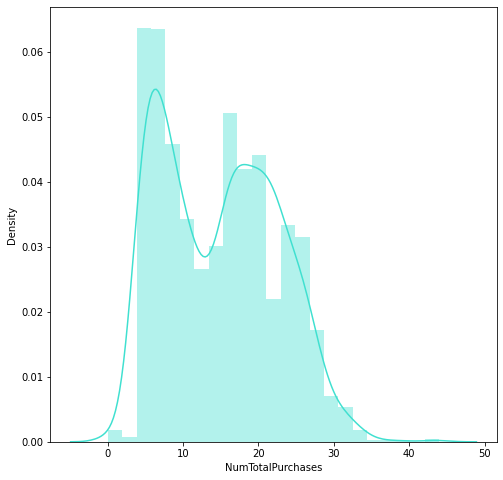

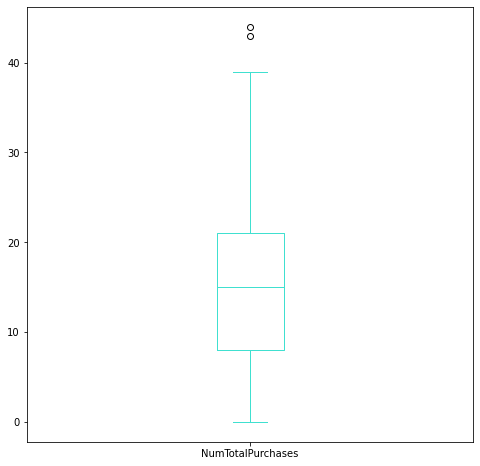

In [58]:
plt.figure(figsize=(8,8))
sns.distplot(df["NumTotalPurchases"],color = 'turquoise')
plt.show()
df["NumTotalPurchases"].plot.box(figsize=(8,8),color = 'turquoise')
plt.show()

In [60]:
col_del = ["'ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head(10).style.background_gradient(cmap='Greys')

In [61]:
x = df.columns 
for i in x:
     print(i)

Year_Birth
Education
Marital_Status
Income
Dt_Customer
Recency
Complain
Response
Kids
Expenses
TotalAcceptedCmp
NumTotalPurchases


In [62]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['First_day'] = '01-01-2015'
df['First_day'] = pd.to_datetime(df.First_day)
df['Day_engaged'] = (df['First_day'] - df['Dt_Customer']).dt.days

Unique categories present in the Age: 9     1189
8      557
10     494
Name: Age, dtype: int64




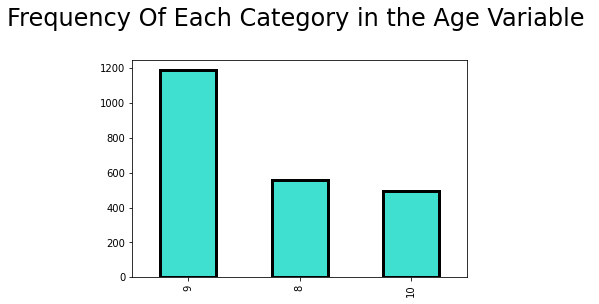

<Figure size 576x576 with 0 Axes>

In [64]:
df['Age'] = (pd.Timestamp('now').year) - (pd.to_datetime(df['Dt_Customer']).dt.year)

print("Unique categories present in the Age:",df['Age'].value_counts())
print("\n")

df['Age'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the Age Variable \n",fontsize=24)
plt.figure(figsize=(8,8))
plt.show()

<AxesSubplot:>

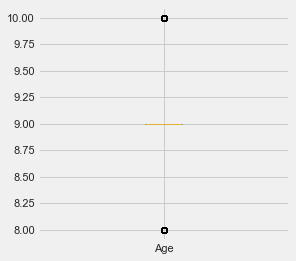

In [119]:
df.boxplot(column='Age',figsize=(4,4))

In [123]:
df = df.loc[df.Age < df.Age.max()]

<AxesSubplot:>

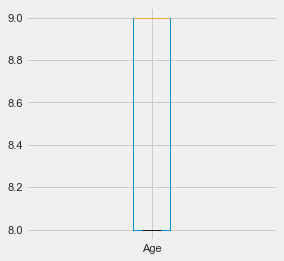

In [124]:
df.boxplot(column='Age',figsize=(4,4))

In [65]:
df.head(5).style.background_gradient(cmap='Greys')

In [66]:
df=df.drop(columns=["Dt_Customer", "First_day", "Year_Birth", "Dt_Customer", "Recency", "Complain","Response"],axis=1)
df.head(5).style.background_gradient(cmap='Greys')

In [67]:
order = [0,1,3,4,6,7,8,2,5]
df = df[[df.columns[i] for i in order]]
df.head(5).style.background_gradient(cmap='Greys')

In [68]:
df.shape

(2240, 9)

In [69]:
pd.crosstab(df['Education'],df['Expenses'],margins=True).style.background_gradient(cmap='Greys')

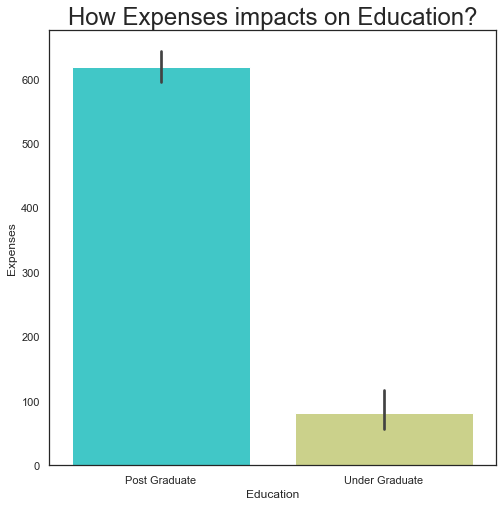

In [70]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Expenses impacts on Education?",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=df,palette="rainbow")

In [71]:
pd.crosstab(df['Marital_Status'],df['Expenses'],margins=True).style.background_gradient(cmap='Greys')

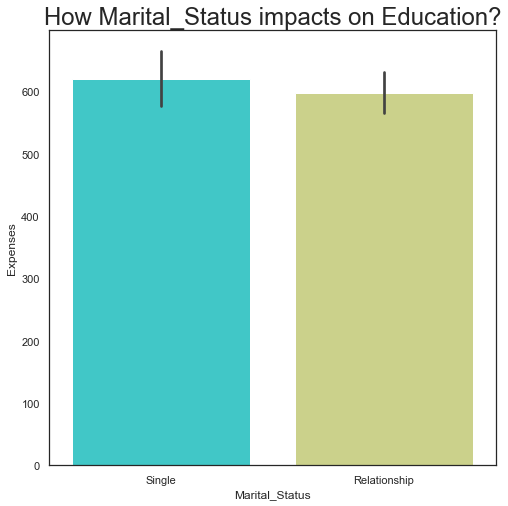

In [72]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Marital_Status impacts on Education?",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=df,palette="rainbow")

In [73]:
pd.crosstab(df['Kids'],df['Expenses'],margins=True).style.background_gradient(cmap='Greys')

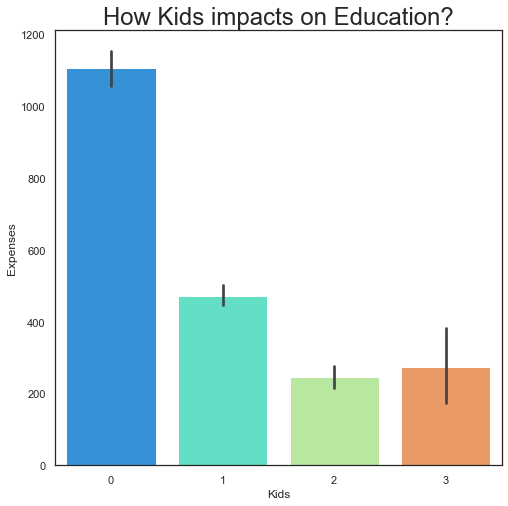

In [74]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Kids impacts on Education?",fontsize=24)
ax = sns.barplot(x="Kids", y="Expenses", data=df,palette="rainbow")

In [75]:
pd.crosstab(df['TotalAcceptedCmp'],df['Expenses'],margins=True).style.background_gradient(cmap='Greys')

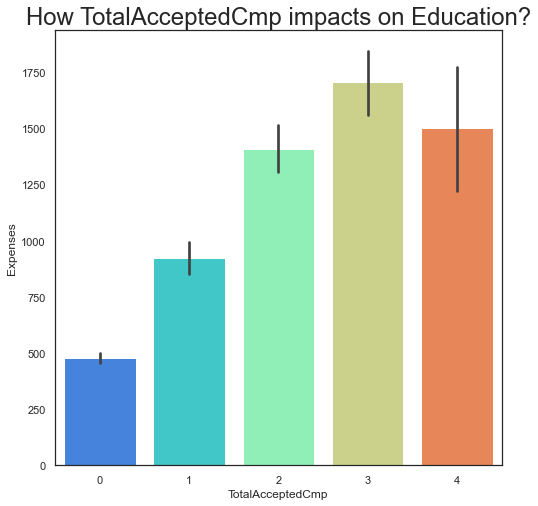

In [76]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How TotalAcceptedCmp impacts on Education?",fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=df,palette="rainbow")

In [77]:
pd.crosstab(df['NumTotalPurchases'],df['Expenses'],margins=True).head().style.background_gradient(cmap='Greys')

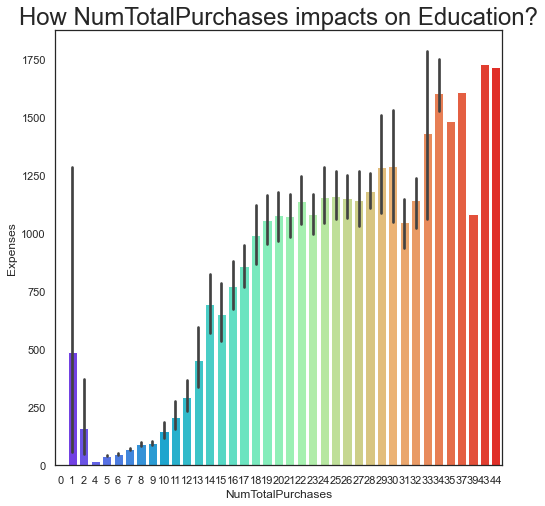

In [78]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How NumTotalPurchases impacts on Education?",fontsize=24)
ax = sns.barplot(x="NumTotalPurchases", y="Expenses", data=df,palette="rainbow")

In [79]:
pd.crosstab(df['Day_engaged'],df['Expenses'],margins=True).head(10).style.background_gradient(cmap='Greys')

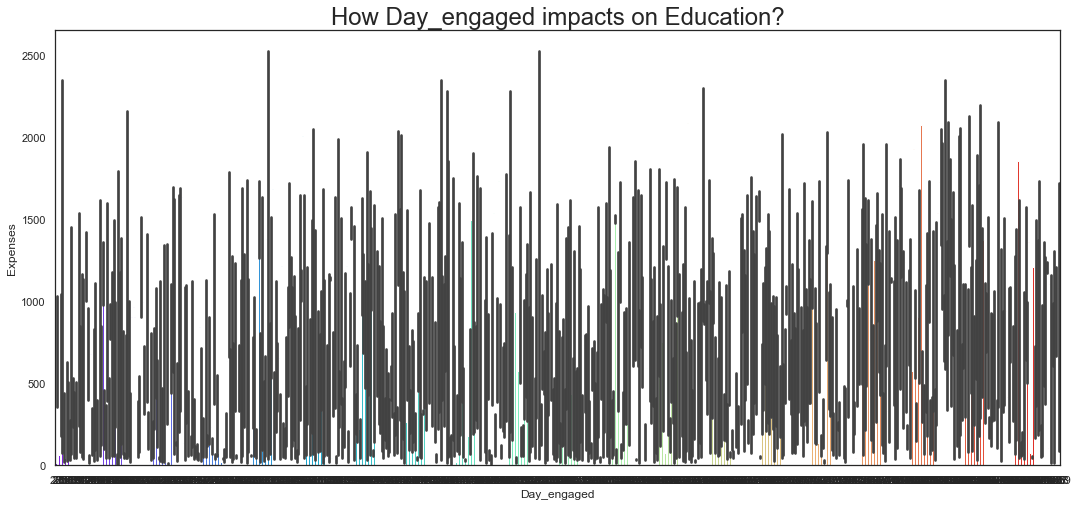

In [80]:
sns.set_theme(style="white")
plt.figure(figsize=(18,8))
plt.title("How Day_engaged impacts on Education?",fontsize=24)
ax = sns.barplot(x="Day_engaged", y="Expenses", data=df,palette="rainbow")

In [81]:
pd.crosstab(df['Age'],df['Expenses'],margins=True).style.background_gradient(cmap='Greys')

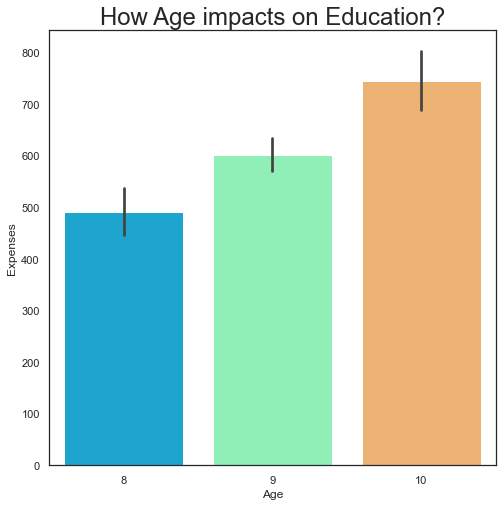

In [82]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How Age impacts on Education?",fontsize=24)
ax = sns.barplot(x="Age", y="Expenses", data=df,palette="rainbow")

In [83]:
df.head(5).style.background_gradient(cmap='Greys')

In [84]:
df.describe(include = 'all').style.background_gradient(cmap='Greys')

<AxesSubplot:>

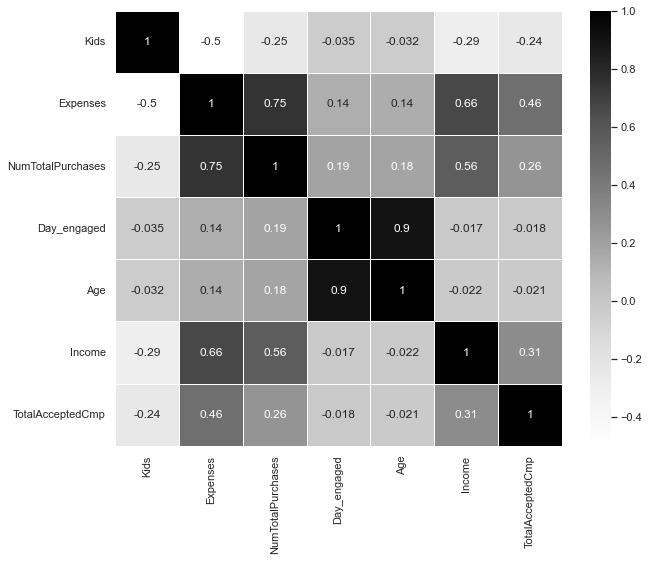

In [85]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap = 'Greys',linewidths=1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Kids               2240 non-null   int64  
 3   Expenses           2240 non-null   int64  
 4   NumTotalPurchases  2240 non-null   int64  
 5   Day_engaged        2240 non-null   int64  
 6   Age                2240 non-null   int64  
 7   Income             2240 non-null   float64
 8   TotalAcceptedCmp   2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


In [94]:
cont_features = df.iloc[:, 2:9] 
print(type(cont_features))
print('\n')
print(cont_features.head())
pd.set_option('display.width',100)

<class 'pandas.core.frame.DataFrame'>


   Kids  Expenses  NumTotalPurchases  Day_engaged  Age   Income  TotalAcceptedCmp
0     0      1617                 25          997   10  58138.0                 0
1     2        27                  6          151    8  46344.0                 0
2     0       776                 21          498    9  71613.0                 0
3     1        53                  8           91    8  26646.0                 0
4     1       422                 19          347    8  58293.0                 0


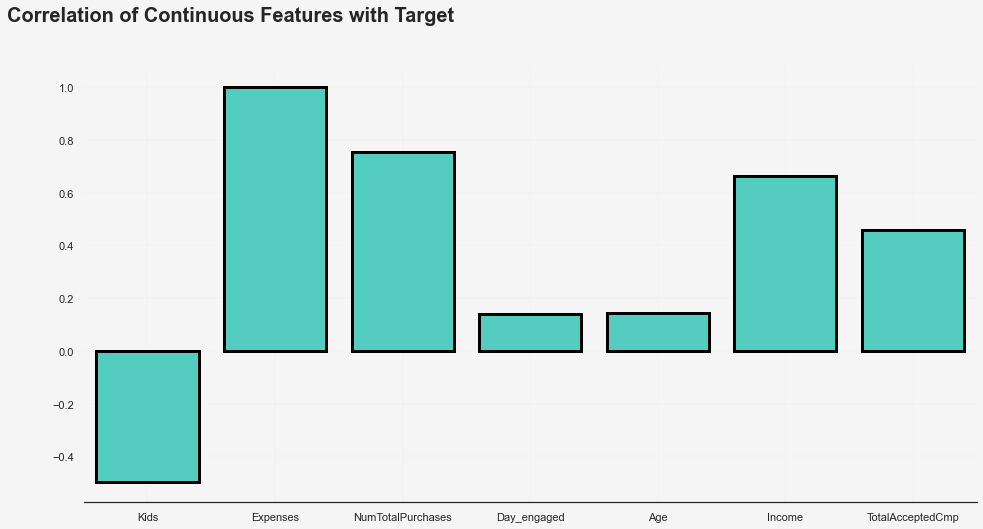

In [95]:
import matplotlib
background_color = "#f6f5f5"

fig = plt.figure(figsize=(16, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#2f5586", "#f6f5f5","#2f5586"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Continuous Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(cont_features.corrwith(df['Expenses']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='turquoise', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

In [96]:
df.dtypes

Education             object
Marital_Status        object
Kids                   int64
Expenses               int64
NumTotalPurchases      int64
Day_engaged            int64
Age                    int64
Income               float64
TotalAcceptedCmp       int64
dtype: object

In [97]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(" Object are:",cate)

 Object are: ['Education', 'Marital_Status']


In [98]:
Int = []
for i in df.columns:
    if (df[i].dtypes == "int64"):
        Int.append(i)

print(" Integers are:",Int)

 Integers are: ['Kids', 'Expenses', 'NumTotalPurchases', 'Day_engaged', 'Age', 'TotalAcceptedCmp']


In [99]:
Float = []
for i in df.columns:
    if (df[i].dtypes == "float64"):
        Float.append(i)

print("Float are:",Float)

Float are: ['Income']


In [100]:
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [101]:
df1 = df.copy()

In [102]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df1.values)
sf_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [103]:
sf_df.head().style.background_gradient(cmap='Greys')

In [104]:
X = sf_df.iloc[:, [7, 3]].values
print(X)

[[ 0.23569584  1.67941681]
 [-0.23545419 -0.96127545]
 [ 0.77399892  0.28267329]
 ...
 [ 0.18947568  1.05495122]
 [ 0.67940139  0.39394775]
 [ 0.02520835 -0.7204576 ]]


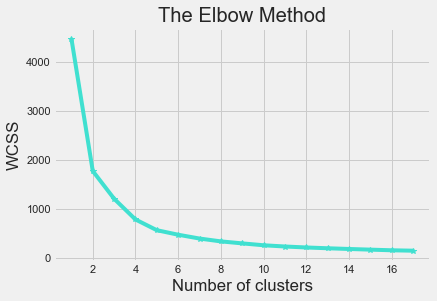

In [106]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 18), wcss,color = "turquoise",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [107]:
kmeans = KMeans(n_clusters =2 , init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(X)

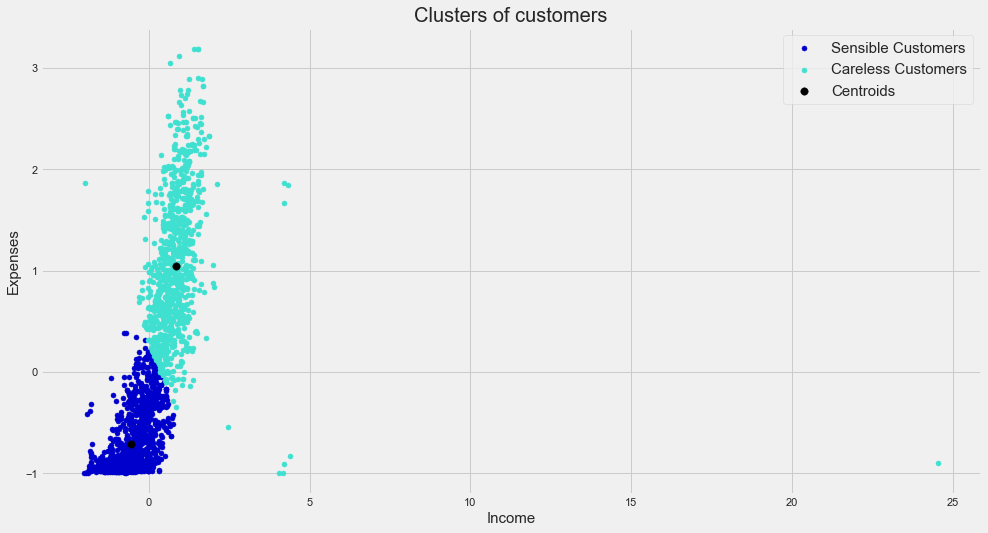

In [108]:
plt.figure(figsize= (15,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'turquoise', label = 'Careless Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plt.title('Clusters of customers',fontsize = 20)
plt.xlabel('Income',fontsize = 15)
plt.ylabel('Expenses',fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [143]:
X = df1.copy()
kmeans = KMeans(n_clusters=5, random_state=0)
X["Cluster"] = kmeans.fit_predict(X)

In [144]:
X_cd = kmeans.fit_transform(X)
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = X.join(X_cd)

In [145]:
X_cd.head()

Centroid_0    Centroid_1    Centroid_2     Centroid_3    Centroid_4
0  14737.233244  24857.573210  33998.475220  608530.062378   5358.690124
1   2907.329816  36674.663725  22170.254683  620322.238675  17109.556830
2  28146.723886  11395.726825  47440.806474  595053.460727   8186.461381
3  16832.177757  56362.483043   2510.762021  640020.284132  36793.662424
4  14824.005675  24718.130681  34117.970953  608373.205528   5159.158947

In [146]:
y = X['Cluster']
X = X.drop('Cluster', axis=1)

In [149]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

In [151]:
decision_tree = dtc(random_state=0)
decision_tree.fit(X,y)

predict = cross_val_predict(estimator = decision_tree, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       690
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       500
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00       654

    accuracy                           1.00      2240
   macro avg       0.80      0.80      0.80      2240
weighted avg       1.00      1.00      1.00      2240



In [152]:
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X, y)
predict = cross_val_predict(estimator = random_forest, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       690
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       500
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00       654

    accuracy                           1.00      2240
   macro avg       0.80      0.80      0.80      2240
weighted avg       1.00      1.00      1.00      2240



In [153]:
knn = KNeighborsClassifier()
knn.fit(X,y)
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       690
           1       1.00      1.00      1.00       395
           2       1.00      1.00      1.00       500
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00       654

    accuracy                           1.00      2240
   macro avg       0.80      0.80      0.80      2240
weighted avg       1.00      1.00      1.00      2240



In [154]:
gnb = GaussianNB()
gnb.fit(X,y)
predict = cross_val_predict(estimator = gnb, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       690
           1       0.93      1.00      0.96       395
           2       0.93      0.99      0.96       500
           3       0.00      0.00      0.00         1
           4       0.97      0.94      0.96       654

    accuracy                           0.96      2240
   macro avg       0.76      0.77      0.77      2240
weighted avg       0.96      0.96      0.96      2240



In [155]:
scv = SVC()
scv.fit(X,y)
predict = cross_val_predict(estimator = scv, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       690
           1       1.00      0.93      0.96       395
           2       1.00      0.93      0.96       500
           3       0.00      0.00      0.00         1
           4       0.96      1.00      0.98       654

    accuracy                           0.97      2240
   macro avg       0.78      0.77      0.78      2240
weighted avg       0.97      0.97      0.97      2240



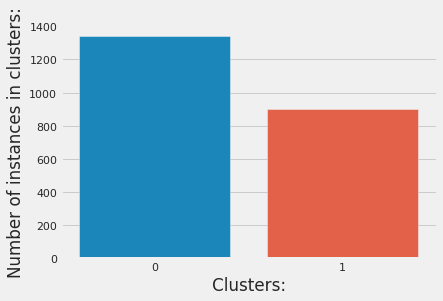

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y_kmeans)
plt.xlabel('Clusters:')
plt.ylabel('Number of instances in clusters:')
plt.show()

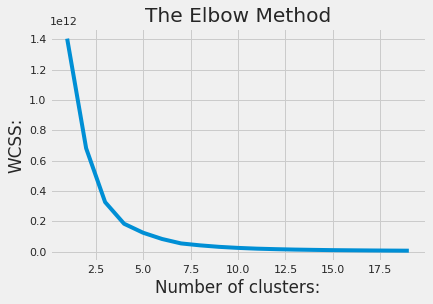

In [173]:
wcss = [] 
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0) 
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss) #plotting the Elbow method Graph 
plt.title('The Elbow Method')  
plt.xlabel('Number of clusters:')  
plt.ylabel('WCSS:') 
plt.show()